In [1]:
from utils.processing import *
from utils.visualisation import *

In [2]:
df = pd.read_csv('data/train.csv')

df = preprocess(df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,tenure_low_year,floor_level_ground,floor_level_high,floor_level_low,floor_level_mid,floor_level_penthouse,floor_level_top,furnishing_partial,furnishing_unfurnished,furnishing_unspecified
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,property_type_public,NA,1988.0,3.0,2.0,1115,...,0,0,0,0,0,0,0,0,0,1


In [3]:
commercial_centres_df = pd.read_csv("./data/auxiliary-data/sg-commerical-centres.csv")
mrt_stations_df = pd.read_csv("./data/auxiliary-data/sg-mrt-stations.csv")
primary_schools_df = pd.read_csv("./data/auxiliary-data/sg-primary-schools.csv")
secondary_schools_df = pd.read_csv("./data/auxiliary-data/sg-secondary-schools.csv")
shopping_malls_df = pd.read_csv("./data/auxiliary-data/sg-shopping-malls.csv")
subzones_df = pd.read_csv("./data/auxiliary-data/sg-subzones.csv")

regions_df = pd.read_csv("./data/extra/sg-regions.csv")

In [4]:
df = join_with_mrt_stations(df, mrt_stations_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing_unspecified,nearest_mrt_distance_in_km,line_cc,line_ce,line_cg,line_dt,line_ew,line_ne,line_ns,line_te
0,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,1,0.49163,0,0,0,0,1,0,0,0


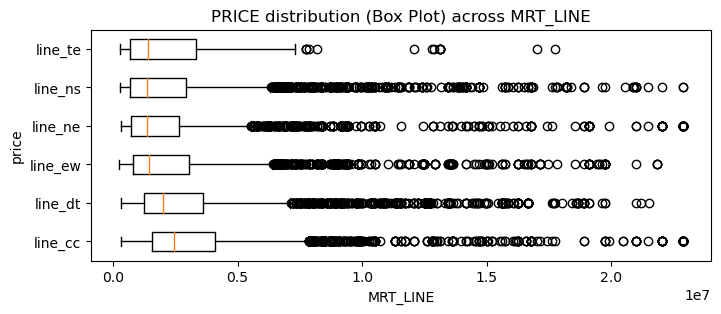

In [5]:
mrt_lines_l = [
    'line_cc',
    'line_dt',
    'line_ew',
    'line_ne',
    'line_ns',
    'line_te'
]

plot_boxplot(df, feature='MRT_LINE', y='price', categories=mrt_lines_l, binary=True, figsize=(8, 3))

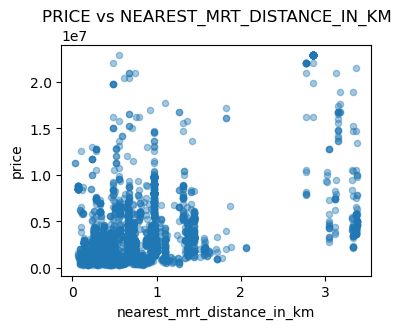

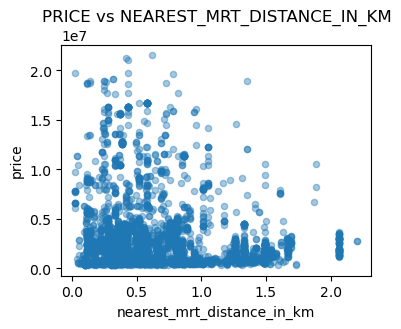

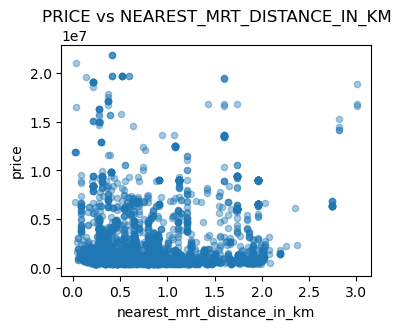

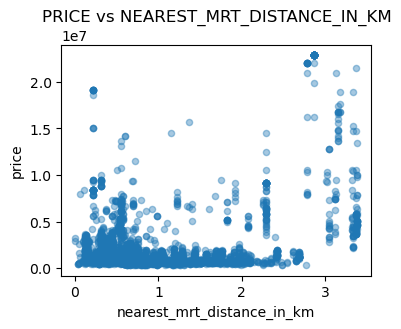

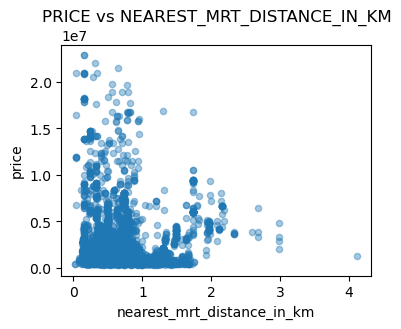

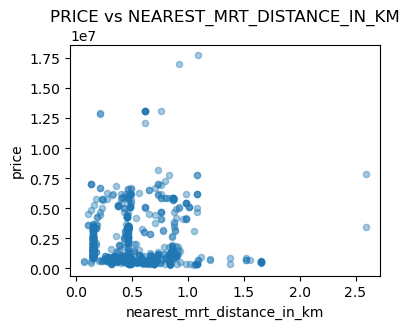

In [6]:
for i in mrt_lines_l: 
    plot_scatterplot(df[df[i]==1], X='nearest_mrt_distance_in_km', y='price', figsize=(4, 3))

In [7]:
df = join_with_regions(df, regions_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,nearest_mrt_distance_in_km,line_cc,line_ce,line_cg,line_dt,line_ew,line_ne,line_ns,line_te,region
0,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,0.49163,0,0,0,0,1,0,0,0,c


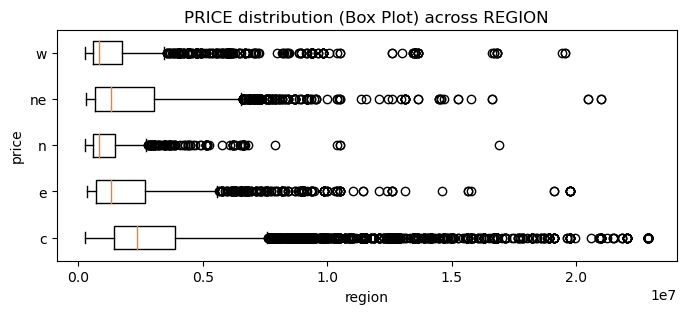

In [8]:
plot_boxplot(df, feature='region', y='price', figsize=(8, 3))

In [9]:
df = join_with_subzones(df, subzones_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,line_cg,line_dt,line_ew,line_ne,line_ns,line_te,region,area_size,population,density
0,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,0,0,1,0,0,0,c,0.3508,15120,43101.482326


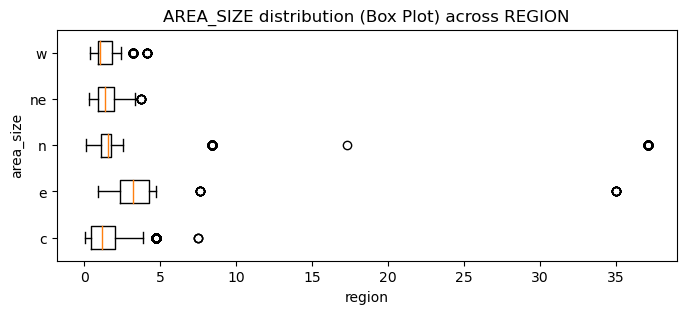

In [10]:
plot_boxplot(df, feature='region', y='area_size', figsize=(8, 3))

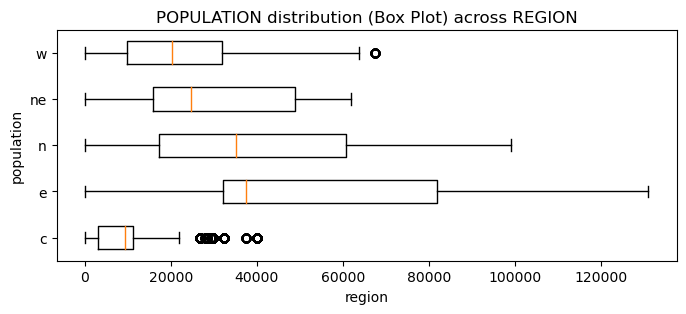

In [11]:
plot_boxplot(df, feature='region', y='population', figsize=(8, 3))

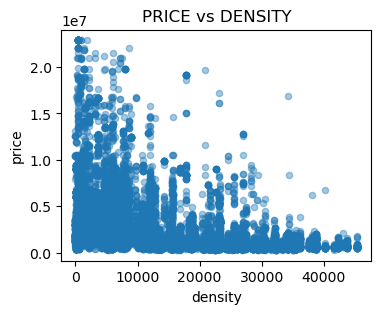

In [12]:
plot_scatterplot(df, X='density', y='price', figsize=(4, 3))

In [13]:
df = join_with_primary_schools(df, primary_schools_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,area_size,population,density,nearest_pri_sch_distance_in_km,nearest_gep_pri_sch_distance_in_km,gep_pri_sch_within_1km,gep_pri_sch_within_1km_2km,gep_pri_sch_outside_2km,pri_sch_within_500m,pri_sch_outside_500m
0,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,0.3508,15120,43101.482326,0.261718,3.344506,0,0,1,1,0


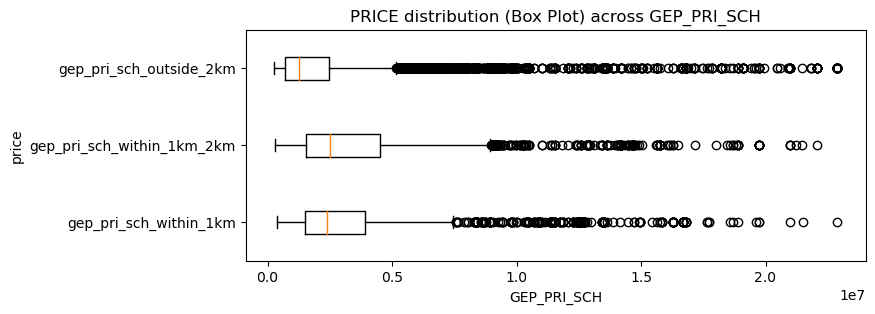

In [14]:
l = ['gep_pri_sch_within_1km', 'gep_pri_sch_within_1km_2km', 'gep_pri_sch_outside_2km']
plot_boxplot(df, feature='GEP_PRI_SCH', y='price', categories=l, binary=True, figsize=(8, 3))

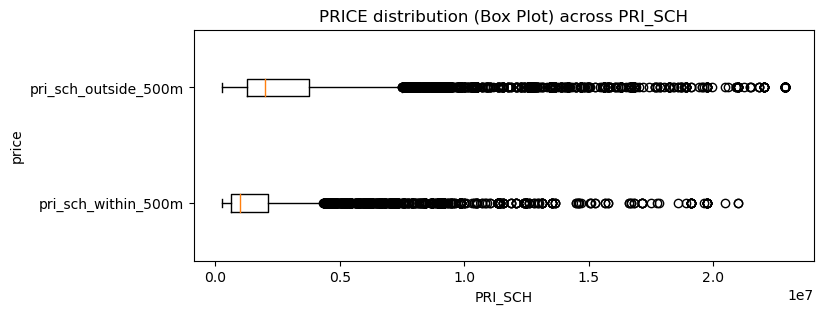

In [15]:
l = ['pri_sch_within_500m','pri_sch_outside_500m']
plot_boxplot(df, feature='PRI_SCH', y='price', categories=l, binary=True, figsize=(8, 3))

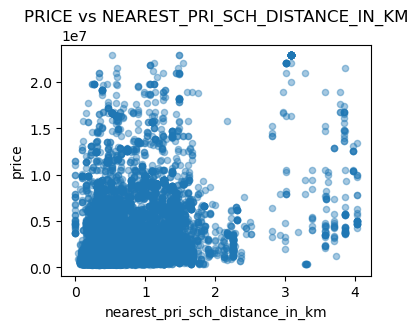

In [16]:
plot_scatterplot(df, X='nearest_pri_sch_distance_in_km', y='price', figsize=(4, 3))

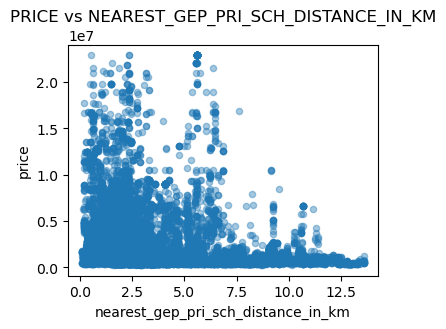

In [17]:
plot_scatterplot(df, X='nearest_gep_pri_sch_distance_in_km', y='price', figsize=(4, 3))

In [18]:
df = join_with_shopping_malls(df, shopping_malls_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,population,density,nearest_pri_sch_distance_in_km,nearest_gep_pri_sch_distance_in_km,gep_pri_sch_within_1km,gep_pri_sch_within_1km_2km,gep_pri_sch_outside_2km,pri_sch_within_500m,pri_sch_outside_500m,nearest_mall_distance_in_km
55,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,15120,43101.482326,0.261718,3.344506,0,0,1,1,0,0.519278


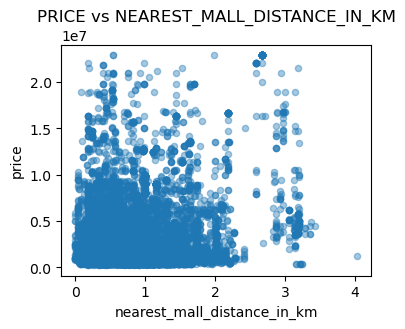

In [19]:
plot_scatterplot(df, X='nearest_mall_distance_in_km', y='price', figsize=(4, 3))

In [4]:
df = join_with_commercial_centres(df, commercial_centres_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,floor_level_top,furnishing_partial,furnishing_unfurnished,furnishing_unspecified,nearest_com_centre_distance_in_km,cc_type_BN,cc_type_CR,cc_type_IEBP,cc_type_IEPB,cc_type_IHL
83739,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,0,0,0,1,2.47968,1,0,0,0,0


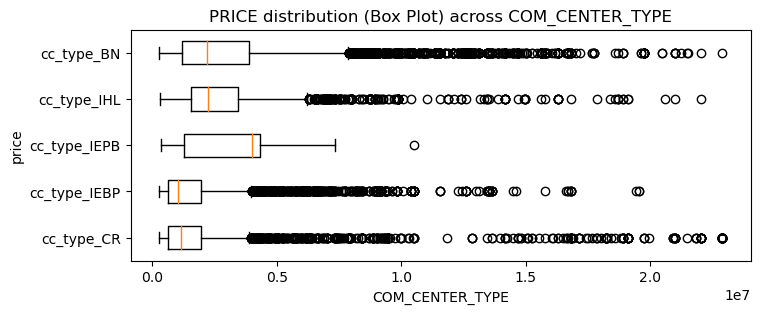

In [6]:
l = ['cc_type_CR', 'cc_type_IEBP', 'cc_type_IEPB', 'cc_type_IHL', 'cc_type_BN']
plot_boxplot(df, feature='COM_CENTER_TYPE', y='price', categories=l, binary=True, figsize=(8, 3))